# WOMEN RESEARCH IN NIGERIA POLITICS

## Problem Statement

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn
# !pip install seaborn 
# !pip install matplotlib 
# !pip install numpy 
# !pip install pandas 
# !pip install imblearn 
# # !pip install xgboost -q --user
# # !pip install --upgrade -q threadpoolctl
# !pip install scikit-plot

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [3]:
# To help with reading and manipulation of data
import numpy as np
import pandas as pd

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# To split the data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To preprocess the data for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# To build a logistic regression classifier
from sklearn.linear_model import LogisticRegression

# To build a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# # To build different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# # To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To create a pipeline for production
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

from scikitplot.metrics import (
    plot_confusion_matrix
    
)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

### Loading Data

In [30]:
churn_dataset = pd.read_csv("woman_dataset.csv")

In [31]:
# Checking the number of rows and columns in the data
churn_dataset.shape

(232, 19)

* The dataset has 232 rows and 20 columns 

## Data Overview

- Observations
- Sanity checks

In [32]:
# let's create a copy of the data
data = churn_dataset.copy()

In [33]:
# let's view the first 5 rows of the data
data.head()

,Work Sector,Educational Qualification,Religion,Age range,"Are you politically active? This includes either of attending rallies, campaigns, or exercising voter franchise.",Do you have political ambitions or desires to hold electoral offices?,Are you affiliated with any political party?,What are factors that hinder or have hindered your political ambitions? Tick all that apply,Do you see yourself as unqualified or as a running mate,Discriminatory socio-cultural and religious practice.,Too expensive,Unsupportive family including spouse and relatives,I think Political parties favor men than women,Childbearing and consideration for family,How can mentroship improve this? Tick all that applies.,"Have you ever received political mentorship services from politicians or godfathers, NGOs?",Would you love to receive (more) mentorship from a male or female politician?,Do you think mentorship will (has) improve(d) your decisions to contest political positions?,Do you think mentorship will improve chances for more females attaining political office?
0,"Informal Sector (Entrepreneurs, Artisans, Trad...",First Degree,Christianity,18-30,Yes,Yes,Yes,NaN,Yes,Yes,Yes,No,No,No,NaN,Yes,Yes,Yes,Yes
1,"Informal Sector (Entrepreneurs, Artisans, Trad...",SSCE and below,Islam,31-49,Yes,No,No,NaN,No,Yes,No,Yes,Yes,Yes,NaN,No,Yes,Yes,Yes
2,"Informal Sector (Entrepreneurs, Artisans, Trad...","Postgraduate (M.Sc., PGD. M.Phil, Ph.D.)",Christianity,18-30,Yes,Yes,Yes,NaN,No,Yes,Yes,No,No,Yes,NaN,No,Yes,Yes,Yes
3,"Formal Sector (9-5 jobs, Professionals, Hybrid...",SSCE and below,Christianity,18-30,Yes,No,No,NaN,No,Yes,Yes,No,No,Yes,NaN,Yes,Yes,Yes,Yes
4,"Informal Sector (Entrepreneurs, Artisans, Trad...",First Degree,Islam,18-30,Yes,No,No,NaN,Yes,No,Yes,No,No,No,NaN,Yes,Yes,No,No


In [34]:
# let's view the last 5 rows of the data
data.tail()

,Work Sector,Educational Qualification,Religion,Age range,"Are you politically active? This includes either of attending rallies, campaigns, or exercising voter franchise.",Do you have political ambitions or desires to hold electoral offices?,Are you affiliated with any political party?,What are factors that hinder or have hindered your political ambitions? Tick all that apply,Do you see yourself as unqualified or as a running mate,Discriminatory socio-cultural and religious practice.,Too expensive,Unsupportive family including spouse and relatives,I think Political parties favor men than women,Childbearing and consideration for family,How can mentroship improve this? Tick all that applies.,"Have you ever received political mentorship services from politicians or godfathers, NGOs?",Would you love to receive (more) mentorship from a male or female politician?,Do you think mentorship will (has) improve(d) your decisions to contest political positions?,Do you think mentorship will improve chances for more females attaining political office?
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data.columns.tolist()

['Work Sector',
 'Educational Qualification',
 'Religion',
 'Age range',
 'Are you politically active? This includes either of attending rallies, campaigns, or exercising voter franchise.',
 'Do you have political ambitions  or desires to hold electoral offices?',
 'Are you affiliated with any political party?',
 'What are factors that hinder or have hindered your political ambitions? Tick all that apply',
 'Do you see yourself as unqualified or as a running mate',
 'Discriminatory socio-cultural and religious practice.',
 'Too expensive',
 'Unsupportive family including spouse and relatives ',
 'I think Political parties favor men than women',
 'Childbearing and consideration for family ',
 'How can mentroship improve this? Tick all that applies.',
 'Have you ever received political mentorship services from politicians or godfathers, NGOs?',
 'Would you love to receive (more) mentorship from a male or female politician?',
 'Do you think mentorship will (has) improve(d) your decisions 

### Data Type Conversions

In [36]:
# let's view the statistical summary of the numerical columns in the data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Work Sector,212,2,"Informal Sector (Entrepreneurs, Artisans, Trad...",129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Educational Qualification,212,5,First Degree,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Religion,212,3,Christianity,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age range,212,4,18-30,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Are you politically active? This includes either of attending rallies, campaigns, or exercising voter franchise.",212,1,Yes,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Do you have political ambitions or desires to hold electoral offices?,212,2,Yes,154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Are you affiliated with any political party?,212,2,Yes,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What are factors that hinder or have hindered your political ambitions? Tick all that apply,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Do you see yourself as unqualified or as a running mate,212,2,Yes,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discriminatory socio-cultural and religious practice.,212,2,No,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations:
* Dataset: the data has missiing value
* Data type: all column has object has the datatype
* Colums: all the columns have categorical values

In [37]:
# Timestamp consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["Unnamed: 7", "What are factors that hinder or have hindered your political ambitions? Tick all that apply"], axis=1, inplace=True)

KeyError: "['Unnamed: 7'] not found in axis"

In [38]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)
    print("*" * 50)

Unique values in Work Sector are :
Informal Sector (Entrepreneurs, Artisans, Traders, Housewives)    129
Formal Sector (9-5 jobs, Professionals, Hybrid jobs)               83
Name: Work Sector, dtype: int64
**************************************************
**************************************************
Unique values in Educational Qualification are :
First Degree                                 110
Postgraduate (M.Sc., PGD. M.Phil, Ph.D.)      45
SSCE and below                                36
Postgraduate (M.Sc., PGD. M.Phil, Ph.D.)      11
ND, NCE                                       10
Name: Educational Qualification, dtype: int64
**************************************************
**************************************************
Unique values in Religion are :
Christianity    106
Islam            95
Others           11
Name: Religion, dtype: int64
**************************************************
**************************************************
Unique values in Age range

**Observation**
* there is no missing value

## Exploratory Data Analysis (EDA)

- EDA is an important part of this project inorder to reveal hidden information from the data.
- It is important to investigate and understand the data better before building a model with it.

**Some of the Questions Answered through the EDA**:

1. How is the gender distributed?
2. What is the distribution of the Educational Qualification?
3. What is the distribution of the permanent voters card?
4. How does the change in likelyhood to vote when there is electoral violence vary by the gender
5. How does the witness of any form of electoral violence during elections vary by the gender
6. How does the witnessing any form of harassment on social media vary by the gender
7. What are the attributes that have a strong correlation with each other?



### Univariate analysis

In [39]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
#     ax_hist2.axvline(
#         data[feature].mean(), color="green", linestyle="--"
#     )  # Add mean to the histogram
#     ax_hist2.axvline(
#         data[feature].median(), color="black", linestyle="-"
#     )  # Add median to the histogram

### Observations on Work Sector

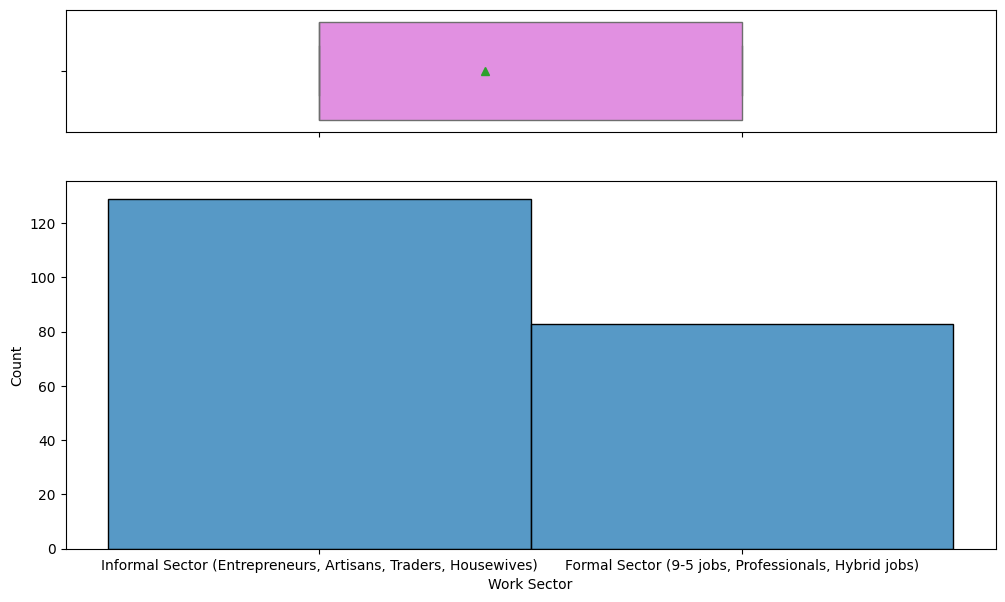

In [40]:
histogram_boxplot(data, "Work Sector")

**Observation**
* Most of the respondent work in formal sector. That is the respondent is either works, 
    1. on a 9:00AM to 5:00Pm schedule or 
    2. as a professionals
    3. on jobs with hybrid mode 
* Few Informal sectors (such as Artisans and Traders) responded.

### Observations on Educational Qualification

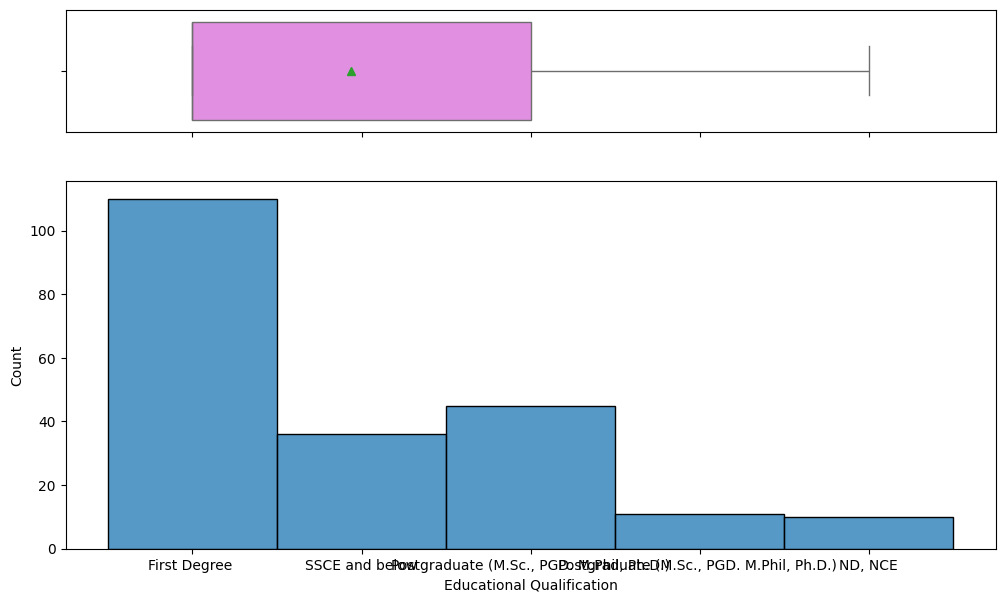

In [41]:
histogram_boxplot(data, "Educational Qualification")

**Observation** 
* More than 400 respondent holds HND or BSC Degree.
* Less than 200 respondent hold postgraduate degree.
* The respondent with ND or NCE or MBBS in View or BTech or Undergraduate are all less than 100.

### Observations on Age Range

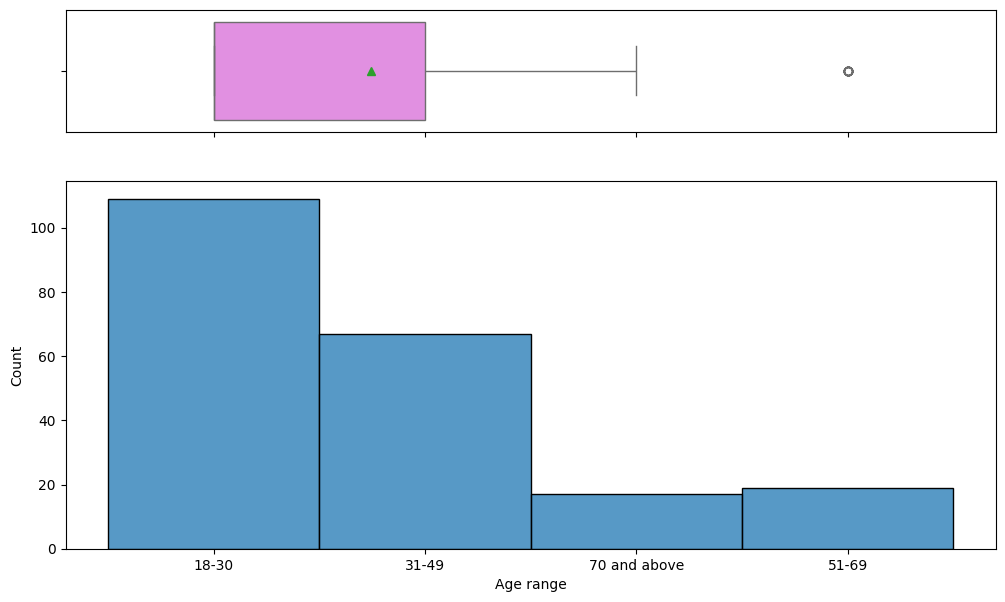

In [42]:
histogram_boxplot(data, "Age range")

* 18-30 is the age range with the highest numebr of respondent follow by 31-40.
* 41-50 is the age range with the lowest number of respondent.

### Observations on 'Respondent with permanent voters card?'

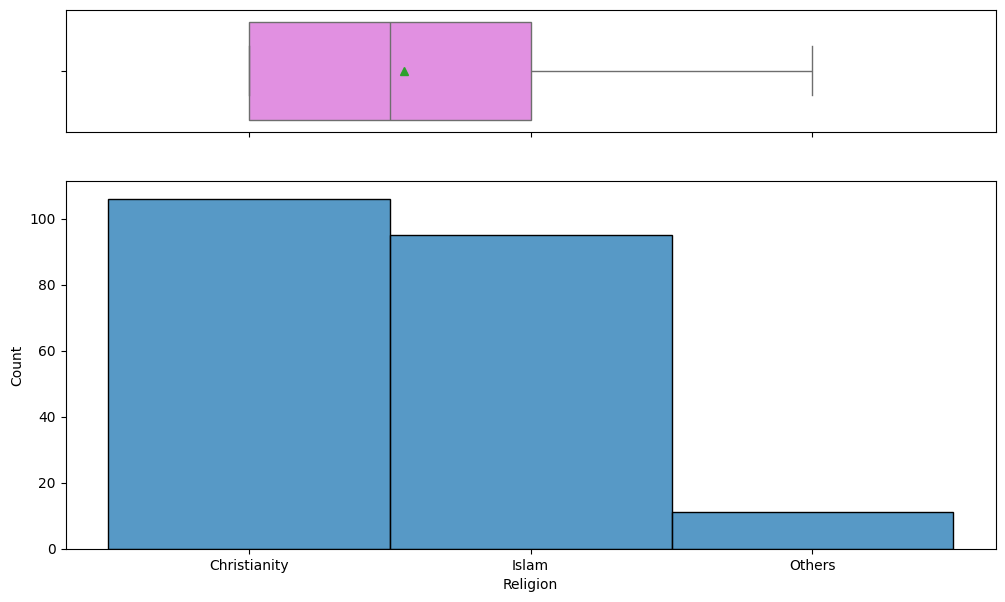

In [43]:
histogram_boxplot(data, "Religion")

**Observation**
* About 70% of the respondent have permanent voters card 

### Observations on <i>Respondent that are likely to vote when there is electoral violence around you</i>?

ValueError: Could not interpret value `Are you likely to vote when there is electoral violence around you?` for `x`. An entry with this name does not appear in `data`.

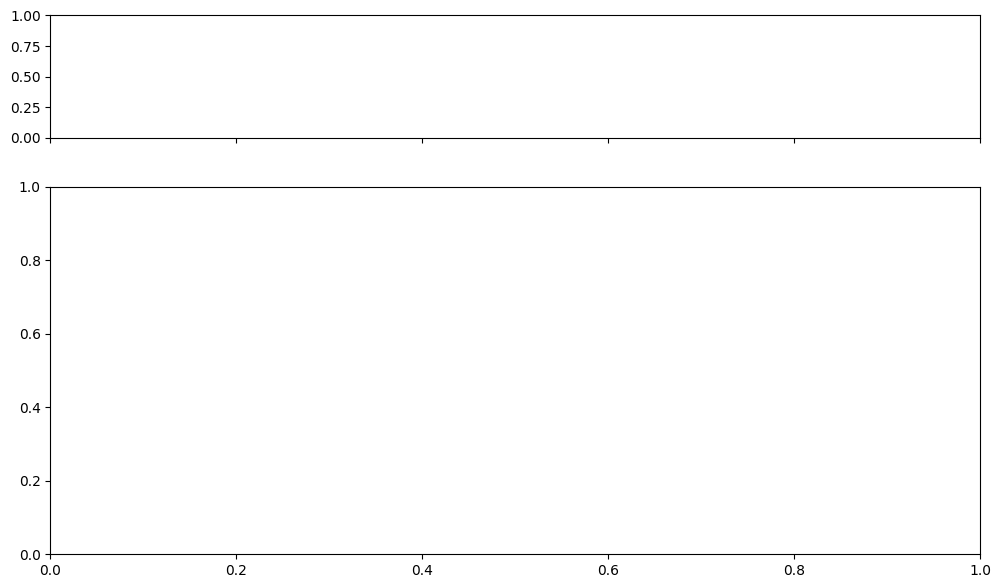

In [44]:
histogram_boxplot(data, "Are you likely to vote when there is electoral violence around you?")

**Observation**
* around 80% of the respondent are not likely to vote when there is electoral violence around. 

### Observations on <i>Respondent that are likely to prevent a "female" loved one from going to vote after violence occurs</i>?

In [ ]:
histogram_boxplot(data, 'Are you likely to prevent a "female" loved one from going to vote after violence occurs?')

**Observation**
* 90% of the respondent indicate that they will prevent female loved ones from going to vote after violence occurs.

### Observations on Respondent that believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?

In [ ]:
histogram_boxplot(data, "Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?")

**Observation**
* Majority of the respondent believe that violenve deters women/female from participating in polical activities such as rallies, elections and campaigns

### Observations on Respondent who have the opinoin that violence impact the confidence of women in engaging in political activities?

In [ ]:
histogram_boxplot(data, "In your opinion, does violence impact the confidence of women in engaging in political activities?")

**Observation**
* Majority of the respondent beleive violence impact the confidence of women in engaging in political activities

### Observations on Respondent that vote in 2023 General Elections?

In [ ]:
histogram_boxplot(data, "Did you vote in 2023 General Elections?")

**Observation**
* Less that 300 respondent did not vote in 2023 General Election

### Observation on Why Some Respondent did Not Vote in 2023 general election

In [ ]:
histogram_boxplot(data, "If No, why not?")

**Observation**

* Majority of the respondent that did not vote are influenced by 
    1. Other reason best known to them
    2. Lack of Permanent Voters Card (PVC) and 
    3. Unavailability  (such as distance, health issues) 
* Less than 100 respondent did not vote due to Electoral Violence                                 
* Work (Journalist, Health officials, Security agents, Electoral officers) is reason for the least number of respondent that did not vote

### Observation on Respondent who has ever witnessed any form of electoral violence during elections?

In [ ]:
histogram_boxplot(data, "Have you ever witnessed any form of electoral violence during elections?")

**Observation**
* Mjority od the respondent has witness at least a particular rform of electoral violence

### Observation on Respondent who has ever witnessed any form of harassment on social media?

In [ ]:
histogram_boxplot(data, "Have you ever witnessed any form of harassment on social media?")

**Observation**

* Majority of the resondent has witnessed at least a particular form of harrasment on socia media 

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Gender

In [ ]:
labeled_barplot(data, "Gender")

* The female respondent is more than the male respondent.

### Observations on Work Sector

In [ ]:
labeled_barplot(data, "Work Sector")

### Observations on Educational Qualification

In [ ]:
labeled_barplot(data, "Educational Qualification")

### Observations on Age range

In [ ]:
labeled_barplot(data, "Age range")

### Observations on Do you have a permanent voters card?

In [ ]:
labeled_barplot(data, "Do you have a permanent voters card?")

### Observations on Are you likely to vote when there is electoral violence around you?

In [ ]:
labeled_barplot(data, "Are you likely to vote when there is electoral violence around you?")

### Observations on Are you likely to prevent a "female" loved one from going to vote after violence occurs?

In [ ]:
labeled_barplot(data, 'Are you likely to prevent a "female" loved one from going to vote after violence occurs?')

### Observations on Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?

In [ ]:
labeled_barplot(data, "Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?")

### Observations on In your opinion, does violence impact the confidence of women in engaging in political activities?

In [ ]:
labeled_barplot(data, "In your opinion, does violence impact the confidence of women in engaging in political activities?")

### Observations on Did you vote in 2023 General Elections?

In [ ]:
labeled_barplot(data, "Did you vote in 2023 General Elections?")

### Observations on If No, why not?

In [ ]:
labeled_barplot(data, "If No, why not?")

### Observations on Have you ever witnessed any form of electoral violence during elections?

In [ ]:
labeled_barplot(data, "Have you ever witnessed any form of electoral violence during elections?")

### Observations on Have you ever witnessed any form of harassment on social media?

In [ ]:
labeled_barplot(data, "Have you ever witnessed any form of harassment on social media?")

## Bivariate Analysis

In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)
    print("*" * 50)

In [ ]:
data.columns

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
# data["Attrition_F"].replace("Existing Customer", 0, inplace=True)
# data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

data["Gender"].replace("Male", 1, inplace=True)
data["Gender"].replace("Female", 0, inplace=True)

data["Work Sector"].replace("Formal Sector (9-5 jobs, Professionals, Hybrid jobs)", 1, inplace=True)
data["Work Sector"].replace("Informal Sector (Artisans, Traders)", 0, inplace=True)

data["Do you have a permanent voters card?"].replace("Yes", 1, inplace=True)
data["Do you have a permanent voters card?"].replace("No", 0, inplace=True)

data["Did you vote in 2023 General Elections?"].replace("Yes", 1, inplace=True)
data["Did you vote in 2023 General Elections?"].replace("No", 0, inplace=True)

data["Educational Qualification"].replace("Postgraduate", 20, inplace=True)
data["Educational Qualification"].replace("Mbbs in view", 15.5, inplace=True)
data["Educational Qualification"].replace("Btech", 10.5, inplace=True)
data["Educational Qualification"].replace("HND, B.Sc.", 10, inplace=True)
data["Educational Qualification"].replace("ND, NCE", 9, inplace=True)
data["Educational Qualification"].replace("Undergraduate ", "Undergraduate", inplace=True)
data["Educational Qualification"].replace("Undergraduate", 8, inplace=True)
data["Educational Qualification"].replace("SSCE and below", 5, inplace=True)
data["Educational Qualification"].astype('float64')

data["Age range"].replace("18-30", 24, inplace=True)
data["Age range"].replace("31-40", 35.5, inplace=True)
data["Age range"].replace("51-60", 55.5, inplace=True)
data["Age range"].replace("41-50", 45.5, inplace=True)
data["Age range"].replace("51-61", 56, inplace=True)
data["Age range"].replace("60 and above", 80, inplace=True)
data["Age range"].astype('float64')

data["Are you likely to vote when there is electoral violence around you?"].replace("No", 0, inplace=True)
data["Are you likely to vote when there is electoral violence around you?"].replace("Yes", 1, inplace=True)
data["Are you likely to vote when there is electoral violence around you?"].replace("Uncertain", 0.5, inplace=True)
data["Are you likely to vote when there is electoral violence around you?"].astype('float64')

data['Are you likely to prevent a "female" loved one from going to vote after violence occurs?'].replace("No", 0, inplace=True)
data['Are you likely to prevent a "female" loved one from going to vote after violence occurs?'].replace("Yes", 1, inplace=True)
data['Are you likely to prevent a "female" loved one from going to vote after violence occurs?'].replace("Uncertain", 0.5, inplace=True)
data['Are you likely to prevent a "female" loved one from going to vote after violence occurs?'].astype('float64')

data["Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?"].replace("No", 0, inplace=True)
data["Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?"].replace("Yes", 1, inplace=True)
data["Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?"].replace("Uncertain", 0.5, inplace=True)
data["Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?"].astype('float64')

data["If No, why not?"].replace("Others", 0.3, inplace=True)
data["If No, why not?"].replace("No PVC", 0, inplace=True)
data["If No, why not?"].replace("Unavailable  (distance, health issues)", 0.5, inplace=True)
data["If No, why not?"].replace("Electoral Violence", 1, inplace=True)
data["If No, why not?"].replace("Work (Journalist, Health officials, Security agents, Electoral officers)", 0.5, inplace=True)
data["If No, why not?"].astype('float64')

data["Have you ever witnessed any form of electoral violence during elections?"].replace("Yes", 1, inplace=True)
data["Have you ever witnessed any form of electoral violence during elections?"].replace("No", 0, inplace=True)
data["Have you ever witnessed any form of electoral violence during elections?"].replace("Uncertain", 0.5, inplace=True)
data["Have you ever witnessed any form of electoral violence during elections?"].astype('float64')

data["Have you ever witnessed any form of harassment on social media?"].replace("Yes", 1, inplace=True)
data["Have you ever witnessed any form of harassment on social media?"].replace("No", 0, inplace=True)
data["Have you ever witnessed any form of harassment on social media?"].replace("Uncertain", 0.5, inplace=True)
data["Have you ever witnessed any form of harassment on social media?"].astype('float64')

In [ ]:
dataCorr = data.copy()

dataCorr.rename(columns = {'Educational Qualification':'Edu. Qlf.'}, inplace = True)
dataCorr.rename(columns = {'Do you have a permanent voters card?':'PVC'}, inplace = True)
dataCorr.rename(columns = {'Did you vote in 2023 General Elections?':'Vote in 2023 Gen. Elec.'}, inplace = True)
dataCorr.rename(columns = {'Are you likely to vote when there is electoral violence around you?':'Vote During Elec. Vio.'}, inplace = True)
dataCorr.rename(columns = {'Are you likely to prevent a "female" loved one from going to vote after violence occurs?':'Allow Female Vote During Elec. Vio.'}, inplace = True)
dataCorr.rename(columns = {'Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?':'Violence Deters Women From Parti.'}, inplace = True)
dataCorr.rename(columns = {'In your opinion, does violence impact the confidence of women in engaging in political activities?':'Violence Impact Women Confi. In Parti.'}, inplace = True)
dataCorr.rename(columns = {'Have you ever witnessed any form of electoral violence during elections?':'Witnessed any Elec. Vio.'}, inplace = True)
dataCorr.rename(columns = {'Have you ever witnessed any form of harassment on social media?':'Witnessed Haras. Social Media'}, inplace = True)

dataCorr.columns

In [ ]:
dataCorr.corr(method='pearson', min_periods=0, numeric_only = True)

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(dataCorr.corr(method='pearson'), annot=True, vmin=-0, vmax=1, fmt=".1f", cmap="Spectral")
plt.show()

**Observation**
* The education qualification is well correlated to the work sector of the respondent
* vote is 2023 election is well correlated with have a PVC and vote during election violence but slightly correlated to having witnessed harrassment on social media
* violence deter women from participating in electoral activitives is higly correlated to allowing femal to vote during electoral violence
* witnessing any form of electoral violence is also correlated to Why repondent do not vote in teh 2023 general election ("if No, why Not")
* Gender shows a slight correlation with 'witnessed any Electoral Violence' 

In [ ]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(dataCorr, hue="Gender",corner=True)
# plot_kws={'line_kws':{'color':'red'}}

plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 9, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Gender vs Did you vote in 2023 General Elections?

In [ ]:
stacked_barplot(data, "Gender", "Did you vote in 2023 General Elections?")

### Gender vs Do you have a permanent voters card?

In [ ]:
stacked_barplot(data, "Gender", "Do you have a permanent voters card?")

### Gender vs Are you likely to vote when there is electoral violence around you?

In [ ]:
stacked_barplot(data, "Are you likely to vote when there is electoral violence around you?", "Gender")

### Gender vs  Are you likely to prevent a "female" loved one from going to vote after violence occurs?

In [ ]:
stacked_barplot(data, 'Are you likely to prevent a "female" loved one from going to vote after violence occurs?', "Gender")

* The customers from two extreme income groups - Earning less than 40K and Earning more than 120k+ are the ones attriting the most.

### Gender vs Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?

In [ ]:
stacked_barplot(data, "Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?", "Gender")

### Gender vs In your opinion, does violence impact the confidence of women in engaging in political activities?

In [ ]:
stacked_barplot(data, "In your opinion, does violence impact the confidence of women in engaging in political activities?", "Gender")

### Gender vs If No, why not?

In [ ]:
stacked_barplot(data, "If No, why not?", "Gender")

### Gender vs Have you ever witnessed any form of electoral violence during elections?

In [ ]:
stacked_barplot(data, "Have you ever witnessed any form of electoral violence during elections?", "Gender")

### Gender vs Have you ever witnessed any form of harassment on social media?

In [ ]:
stacked_barplot(data, "Have you ever witnessed any form of harassment on social media?", "Gender")

In [ ]:
stacked_barplot(data, "Educational Qualification", "Gender")

### Gender vs Age range

In [ ]:
stacked_barplot(data, "Age range", "Gender")

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Gender vs Age range

In [ ]:
distribution_plot_wrt_target(data, "Age range", "Gender")

### Gender vs Work Sector

In [ ]:
distribution_plot_wrt_target(data, "Work Sector", "Gender")

### Gender vs Educational Qualification

In [ ]:
distribution_plot_wrt_target(data, "Educational Qualification", "Gender")

### Gender vs Do you have a permanent voters card?

In [ ]:
distribution_plot_wrt_target(data, "Do you have a permanent voters card?", "Gender")

### Gender vs Are you likely to vote when there is electoral violence around you?

In [ ]:
distribution_plot_wrt_target(data, "Are you likely to vote when there is electoral violence around you?", "Gender")

### Gender vs Are you likely to prevent a "female" loved one from going to vote after violence occurs?

In [ ]:
distribution_plot_wrt_target(data,  'Are you likely to prevent a "female" loved one from going to vote after violence occurs?', "Gender")

### Gender vs Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?

In [ ]:
distribution_plot_wrt_target(data, "Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?", "Gender")

### Gender vs In your opinion, does violence impact the confidence of women in engaging in political activities?

In [ ]:
distribution_plot_wrt_target(data, "In your opinion, does violence impact the confidence of women in engaging in political activities?", "Gender")

### Gender vs Did you vote in 2023 General Elections?

In [ ]:
distribution_plot_wrt_target(data, "Did you vote in 2023 General Elections?", "Gender")

### Gender vs If No, why not?

In [ ]:
distribution_plot_wrt_target(data, "If No, why not?", "Gender")

In [ ]:
distribution_plot_wrt_target(data, "Have you ever witnessed any form of electoral violence during elections?", "Gender")

In [ ]:
distribution_plot_wrt_target(data, "Have you ever witnessed any form of harassment on social media?", "Gender")

### Multivariant Analysis

In [ ]:
# def line_plot(cols): 
#     plt.figure(figsize=(23, 11))
#     for i, variable in enumerate(cols):
#         plt.subplot(3, 3, i + 1)
#         sns.lineplot(data=data, x="Educational Qualification", y=variable, hue="Gender", ci=0)
#         plt.tight_layout()
#         plt.title(variable)
#     plt.show()

# def line_plot(cols):
#     num_plots = len(cols)
#     rows = (num_plots + 2) // 3  # Determine the number of rows needed
    
#     plt.figure(figsize=(23, rows * 4))  # Adjust the figure size based on the number of rows
    
#     for i, variable in enumerate(cols):
#         plt.subplot(rows, 3, i + 1)
#         sns.lineplot(data=data, x="Educational Qualification", y=variable, hue="Gender", ci=0)
#         plt.ylabel(variable)  # Set y-axis label
#         plt.tight_layout()
#         plt.title(variable)
    
#     plt.show()

# import matplotlib.pyplot as plt
# import seaborn as sns

def line_plot( cols):
    num_plots = len(cols)
    rows = (num_plots + 2) // 3  # Determine the number of rows needed
    
    plt.figure(figsize=(23, rows * 4))  # Adjust the figure size based on the number of rows
    
    for i, variable in enumerate(cols):
        plt.subplot(rows, 3, i + 1)
        
        # Count the occurrences of "Yes" and "No" for the given variable, grouped by Educational Qualification and Gender
        counts = data.groupby(['Educational Qualification', 'Gender', variable]).size().reset_index(name='Count')
#         counts = data.groupby(['Edu. Qlf.', 'Gender', variable]).size().reset_index(name='Count')
        
        # Plot the data with different markers for "Yes" and "No"
        sns.lineplot(data=counts, x="Educational Qualification", y='Count', hue="Gender", style=variable, markers=True, dashes=False)
        
        plt.ylabel(f"{variable}")  # Set y-axis label
        plt.title(variable)
        plt.tight_layout()
    
    plt.show()



In [ ]:
dataCorr

In [ ]:
cols = data[["Do you have a permanent voters card?","Did you vote in 2023 General Elections?"]].columns.tolist()
line_plot(cols)

# (['Gender', 'Work Sector', 'Edu. Qlf.', 'Age range', 'PVC',
#        'Vote During Elec. Vio.', 'Allow Female Vote During Elec. Vio.',
#        'Violence Deters Women From Parti.',
#        'Violence Impact Women Confi. In Parti.', 'Vote in 2023 Gen. Elec.',
#        'If No, why not?', 'Witnessed any Elec. Vio.',
#        'Witnessed Haras. Social Media'],
#       dtype='object')


**Observation**
* Majority lf the females that do not vot in the 2023 General Election hold BTech follow by MBBS in View
* Majority of the female that have PVC are Undergraduate Studnet follow by BTech and Mbbs in view Holder

In [ ]:
cols = data[
    ["Are you likely to vote when there is electoral violence around you?",'Are you likely to prevent a "female" loved one from going to vote after violence occurs?']
].columns.tolist()
line_plot(cols)

**Observation**
* Majority of the females that their education level is undergarduate indicate they are not likely to vote when there is electoral violence around them
* Although more male shows that are not likely to vote when there is electoral violence around them
* Females with ND,NCE qualification still show willingness to vote despicte electoral violence around them
* only Females with ND,NCE are uncertain to prevent a "female" loved one's from going to vote after violence occurs 

In [ ]:
cols = data[
    ["Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?"
     ]
].columns.tolist()
line_plot(cols)

In [ ]:
cols = data[
    ['In your opinion, does violence impact the confidence of women in engaging in political activities?']
].columns.tolist()
line_plot(cols)

**Observation**
* Male respondent who have Mbbs inn view are **uncertain if** violence deters women from participating in pratical activities sucg as as rallies, elections, and campaigns

* Male respondent who have SSCE and Below claims that violence **does not** deters women from participating in pratical activities sucg as as rallies, elections, and campaigns

* All the female respondent, irrespective of their educational level claims that **agree** that violence deters women from participating in pratical activities sucg as as rallies, elections, and campaigns

In [ ]:
cols = data[
    ["Have you ever witnessed any form of electoral violence during elections?",
     'Have you ever witnessed any form of harassment on social media?']
].columns.tolist()
line_plot(cols)

**Observation**
* Male respondent who have BTech and undergraduate are are the lowest among all the respondent that has ever witnessed any form of electoral violence during elections

* All the female respondent, irrespective of their educational level claims that **agree** that they have witnessed any form of electoral violence during elections with females with BTech beign the highest.

* Male respondent who have BTech and Mbbs in view are are the lowest among all the respondent that has ever witnessed any form of harrassment on social media

* All the female respondent, irrespective of their educational level claims that **agree** that they have witnessed any form of harrassment on social media with females with undergarduate beign the highest follow by Mbbsin view.

<a id='eda'></a>
### <a id='link'>Summary of EDA</a>

* The dataset has total of 533 Female and 258 Male respondent
* There are no missing values in the dataset
* High level of correlation exist between some of the variables.
* There are also outilers

**Data Cleaning**
* Timestamp column contains uniques ID for response. This column has been dropped. 
* The target varaible is encoded to numeric.


In [ ]:
# creating histograms
dataCorr.hist(figsize=(14, 14))
plt.show()

### Let's find the percentage of outliers, in each column of the data, using IQR.

In [ ]:
Q1 = dataCorr.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = dataCorr.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
lower

In [ ]:
upper

In [ ]:
(
    (dataCorr.select_dtypes(include=["float64", "int64"]) < lower)
    | (dataCorr.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

**Observation**
* After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in Education qualification, Vote During Elec. Vio., Allow Female Vote During Elec. Vio., etc) and we would want our model to learn the underlying pattern for such customers.

In [ ]:
data1 = data.copy()

In [ ]:
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
X = data1.drop([ 'Are you likely to prevent a "female" loved one from going to vote after violence occurs?'], axis=1)
y = data1[ 'Are you likely to prevent a "female" loved one from going to vote after violence occurs?']

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

In [ ]:
reqd_col_for_impute = ["Educational Qualification", "Gender", "Are you likely to vote when there is electoral violence around you?"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

* Here we confirm that there is no missing values / all missing values have been treated.

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

### Encoding categorical variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

* After encoding there are 28 columns.

In [ ]:
X_train.head()

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.
- Accuracy
- Precision
- Recall
- F1-Score

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model with original data

In [ ]:
X_train

In [ ]:
X_val

In [ ]:
X_val.drop([ 'Age range_51-61'], axis=1,inplace=True)
X_val

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train), average='weighted')
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val), average='weighted')
    print("{}: {}".format(name, scores_val))

### Performance Analysis

- Logistic Regression for predicting participation of Female in Election process


In [ ]:
# instantiate the model (using the default parameters)
# LogisticRegression(random_state=1)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Yes', 'No', 'Uncertain']
print(classification_report(y_test, y_pred, target_names=target_names))

**DESCRIPTION OF THE WORK SO FAR**

* **STEP 1:** EXPLORATORY DATA ANALYSIS (EDA)
    - the EDA analysis provide proper understanding of the data
    - show existence of outliers
    
* **STEP 2:** SPLITING OF DATA
    - Split data into Train and Test Set
    
* **STEP 3:** APPLY MINMAX
    - Apply MinMax Scaler on Train Set
    - Apply MinMax Scaler on Test Set
    
* **STEP 4:** TRAIN MODEL
    - Train the Logictic Regression Model on the Train Set
    
* **STEP 5:** EVALUATE
    - Evaluate the Model performance on the Test Set
    - metric include Accuracy, Recall, F1-score, Precision
    - the model recorded the following performance
        1. **Accuracy of 90%**, 
        2. **F1-score of 88%**, 
        3. **Recall of 90%** and 
        4. **Precision 88%** 
